<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [9]</a>'.</span>

In [2]:
# auto-reload modules when they have changed
%reload_ext autoreload
%autoreload 2

In [3]:
from modules.analyze.blob_detection import BlobDetector
from modules.load import image
from config import config as cfg

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from tabulate import tabulate

In [4]:
SOURCE_IMAGE_PATH = '/Users/kappel/Messungen/Setup04/JaKa/post_hack/23_07_06/control-77K-buffer+glycerol-vitrified/10uW/images/img_control_NaP_100mM_ph7dot5_Glycerol10_10uW_77K_circpol_20um_001.img'

In [5]:
# Parameters
SOURCE_IMAGE_PATH = "/Users/kappel/Messungen/Setup04/JaKa/post_hack/23_08_09/77K-33nM-eGFP-vitrified/20uW/images/img_eGFP_33nm_NaP_100mM_ph7dot5_Treh7dot5_20uW_77K_circpol_003.img"


In [6]:
# Load image
im = image.load_from_path(SOURCE_IMAGE_PATH)

<class 'numpy.ndarray'>
<class 'numpy.int64'>


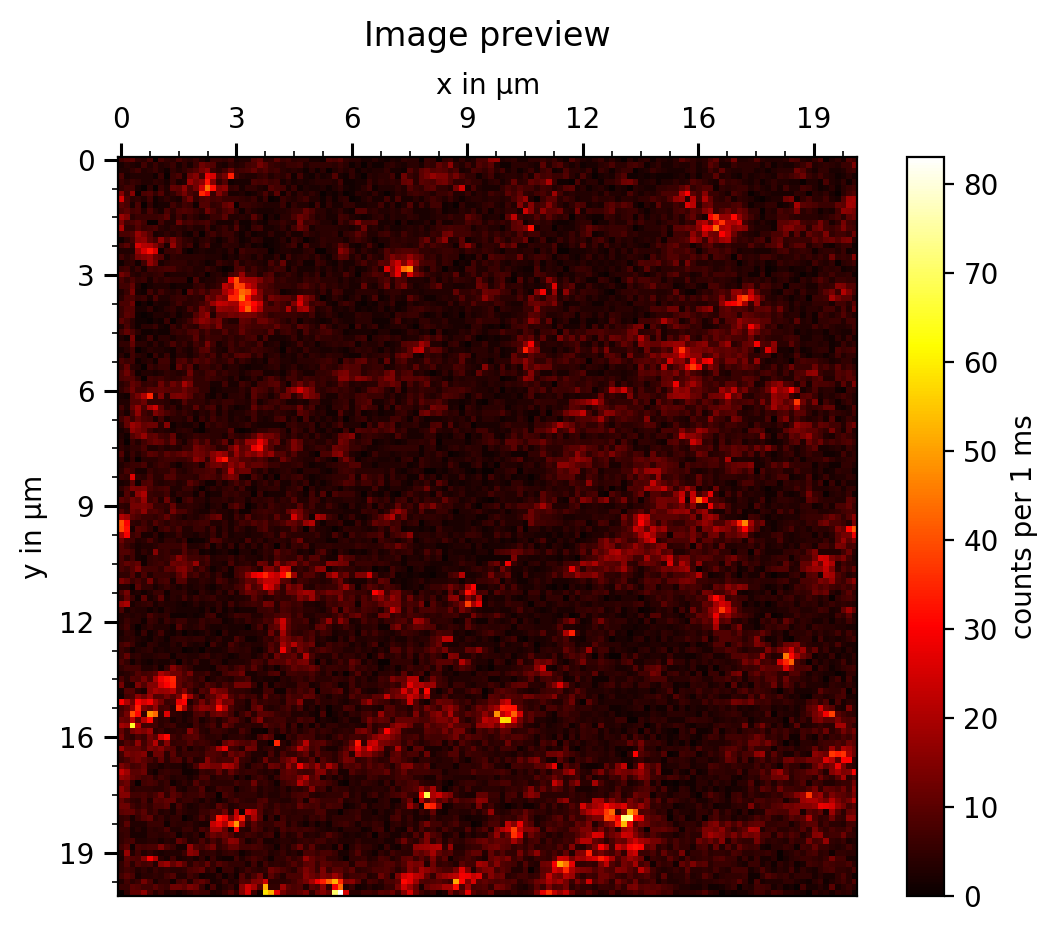

Data (arrays) in image file:
  - preview : (128, 128), int64


Minimum intensity:  0
Maximum intensity:  83
Median intensity:   5


In [24]:
image = im.data['preview']
print(type(image))
print(type(image[0][0]))

im.preview()

min_intensity = np.amin(image)
max_intensity = np.amax(image)
median_intensity = np.median(image)

# Print the different intensity values
print('Minimum intensity: ', min_intensity)
print('Maximum intensity: ', max_intensity)
print('Median intensity:  ', int(median_intensity))


In [ ]:
# Create histogram of grayscale values from image


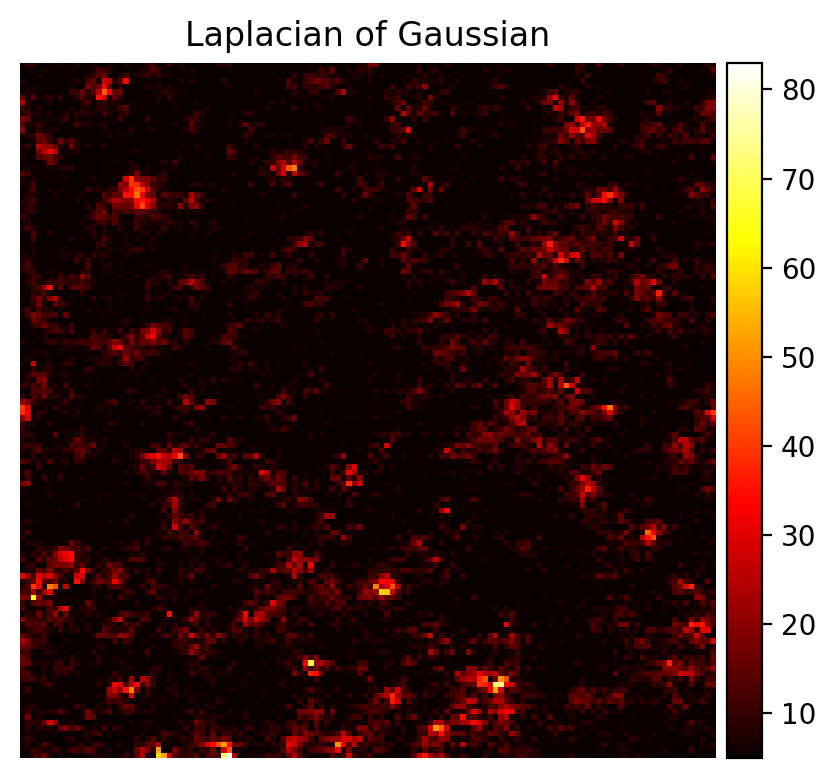

In [17]:
# Initialize blob detector
bd = BlobDetector(input_image=image, blob_type='log')

# Detect blobs
blobs = bd.detect_blobs(min_sigma=3, max_sigma=4, num_sigma=10, threshold=0.1);

# Plot blobs on image
bd.plot_blobs(blobs, vmin=np.median(image))


In [9]:
print(blobs)
blob_data = blobs

[[127.          37.           3.        ]
 [ 24.          21.           3.        ]
 [114.          87.           3.        ]
 [ 96.          66.           3.        ]
 [127.          25.           3.        ]
 [ 11.         104.           3.        ]
 [ 19.          49.           3.        ]
 [ 64.           0.           3.        ]
 [115.          19.           3.        ]
 [  5.          15.           3.        ]
 [ 72.          26.           3.        ]
 [ 86.         116.           3.        ]
 [ 78.         104.           3.        ]
 [ 91.           8.           3.        ]
 [ 64.         127.           3.        ]
 [110.          53.           3.        ]
 [ 25.         108.           3.        ]
 [123.          76.           3.        ]
 [ 35.          98.           3.        ]
 [ 96.           3.           3.        ]
 [116.          68.           3.        ]
 [ 76.          60.           3.        ]
 [ 50.          24.           3.        ]
 [126.          59.           3.  

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [10]:
blobs_log = blob_data
blobs = []

image_array = im.data['APD1'] + im.data['APD2']

for blob in blobs_log:
    # Get blob coordinates and radius
    y, x, r = blob

    # Extract blob pixels from original image
    blob_pixels = image_array[int(y - r):int(y + r), int(x - r):int(x + r)]

    if blob_pixels.shape[0] == blob_pixels.shape[1]: 
        blobs.append(blob_pixels)
    else:
        pass



KeyError: 'APD1'

In [ ]:
# Create list to store average intensities
avg_intensities = []
max_intensities = []

# Loop over blobs and plot in subplots
for i, blob in enumerate(blobs):
    # Calculate average intensity
    avg_intensity = np.mean(blob)

    # Calculate max intensity
    max_intensity = np.max(blob)

    avg_intensities.append(avg_intensity)
    max_intensities.append(max_intensity)

# Calculate histogram parameters
r_avg_intensities = [round(intensity) for intensity in avg_intensities]
r_max_intensities = [round(intensity) for intensity in max_intensities]

print(r_avg_intensities)
print(r_max_intensities)

In [ ]:
blob_data = []
for i, blob in enumerate(blobs):
    blob_data.append(['blob_{}'.format(i+1), r_avg_intensities[i], r_max_intensities[i]])

print(blob_data)

# Print the table using the tabulate function
print(tabulate(blob_data, headers=['ID', 'Avg.\nintensity', 'Max.\nintensity'], tablefmt='rst'))